In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/aug_train.csv')

In [ ]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
data.shape

(19158, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## **Features**
enrollee_id : Unique ID for candidate.

city: City code.

city_ development _index : Developement index of the city.

gender: Gender of candidate.

relevent_experience: Relevant experience of candidate.

enrolled_university: Type of University course enrolled if any.

education_level: Education level of candidate.

major_discipline :Education major discipline of candidate.

experience: Candidate total experience in years.

company_size: No of employees in current employer's company.

company_type : Type of current employer.

last_new_job: Difference in years between previous job and current job.

training_hours: training hours completed.

target: 0 will Not look for job change, 1 will look for a job change.





# **Exploratory Data Analysis**

In [ ]:
#before start EDA and plotting data i'll drop "enroll_id" column as we don't need it
data.drop("enrollee_id", axis=1, inplace=True)

In [ ]:
data.shape

(19158, 13)

<Axes: xlabel='target', ylabel='city_development_index'>

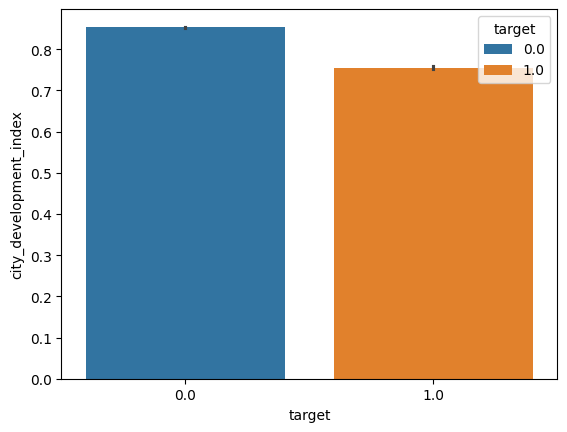

In [ ]:
#people from develop cities are less likely to look for job
sns.barplot(data=data, x="target", y="city_development_index", hue="target")

<ipython-input-765-fa9c4f7c2039>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='city_development_index', y='gender', inner='box', palette='Dark2')


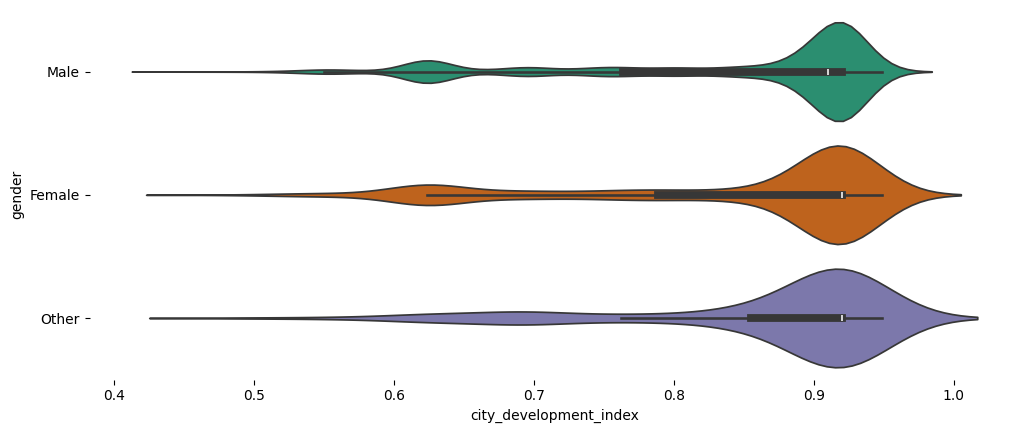

In [ ]:
# gender vs city_development_index

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='city_development_index', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='gender', ylabel='training_hours'>

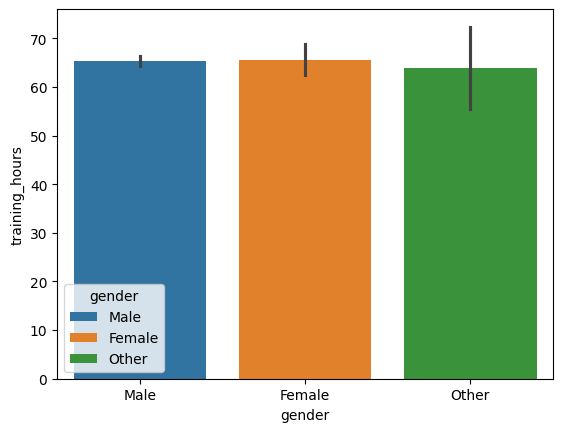

In [ ]:
sns.barplot(data=data, x="gender", y="training_hours", hue="gender")
#Finding: Work hours are equal across genders.

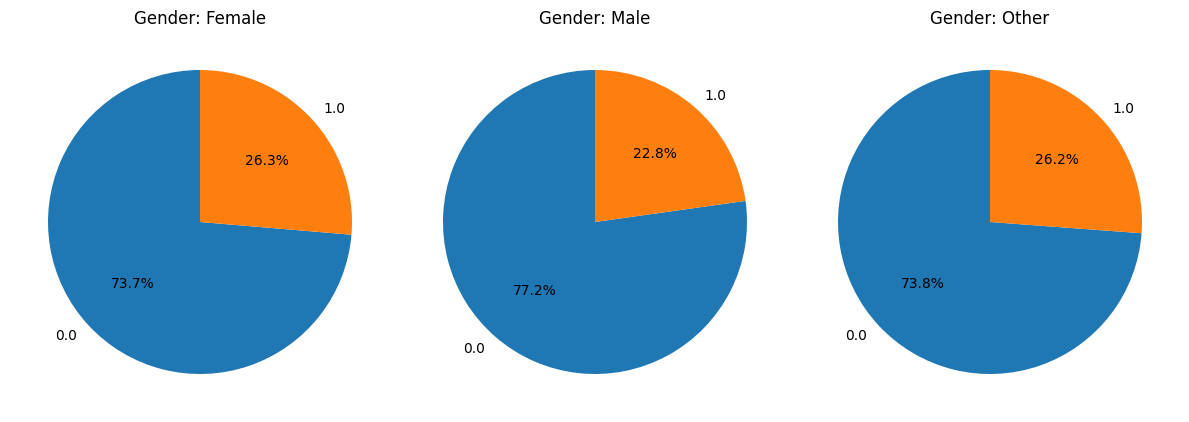

In [ ]:
#Comparing among genders to find out the specific group who tends to look for job frequently
# Count occurrences of each combination of 'gender' and 'target'
gender_target_counts = data.groupby(['gender', 'target']).size().unstack(fill_value=0)

# Plotting pie chart for each gender
fig, axes = plt.subplots(1, len(gender_target_counts), figsize=(12, 6))

for i, (gender, counts) in enumerate(gender_target_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Gender: {gender}')

plt.tight_layout()
plt.show()


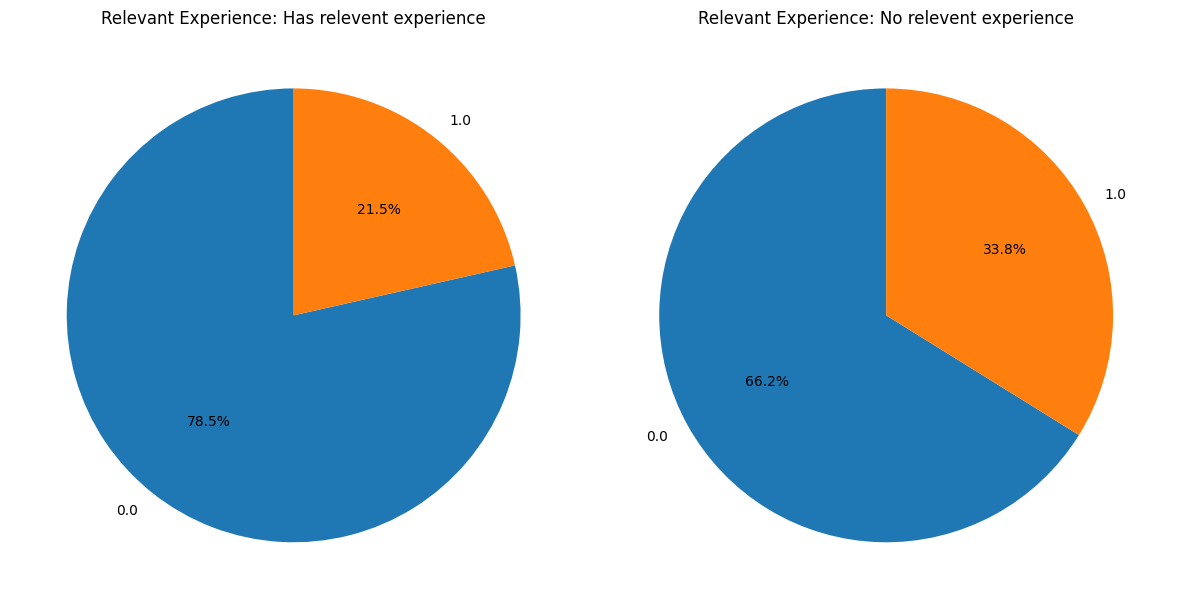

In [ ]:

# Count occurrences of each combination of 'relevent_experience' and 'target'
experience_target_counts = data.groupby(['relevent_experience', 'target']).size().unstack(fill_value=0)

# Plotting pie chart for each experience
fig, axes = plt.subplots(1, len(experience_target_counts), figsize=(12, 6))

for i, (experience, counts) in enumerate(experience_target_counts.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Relevant Experience: {experience}')

plt.tight_layout()
plt.show()


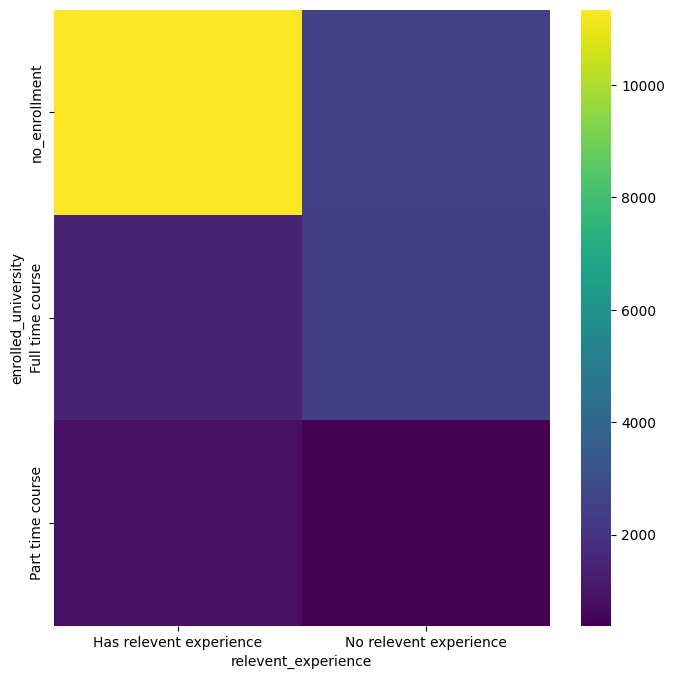

In [ ]:

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['enrolled_university'].value_counts()
    for x_label, grp in data.groupby('relevent_experience')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('relevent_experience')
_ = plt.ylabel('enrolled_university')

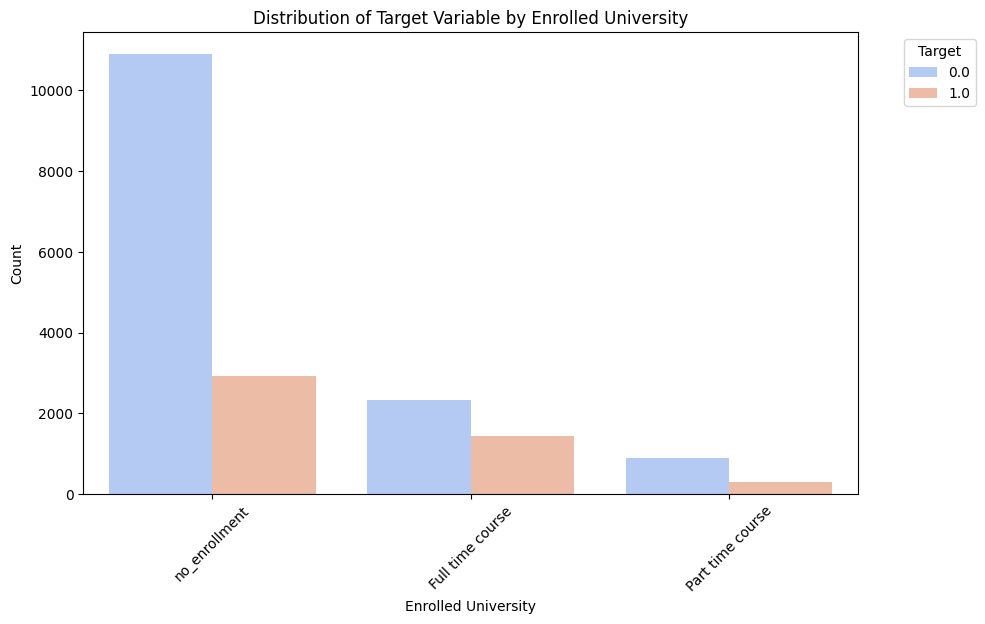

In [ ]:
# Count occurrences of each combination of 'enrolled_university' and 'target'
university_target_counts = data.groupby(['enrolled_university', 'target']).size().unstack(fill_value=0)

# Plotting count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='enrolled_university', hue='target', palette='coolwarm')
plt.title('Distribution of Target Variable by Enrolled University')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

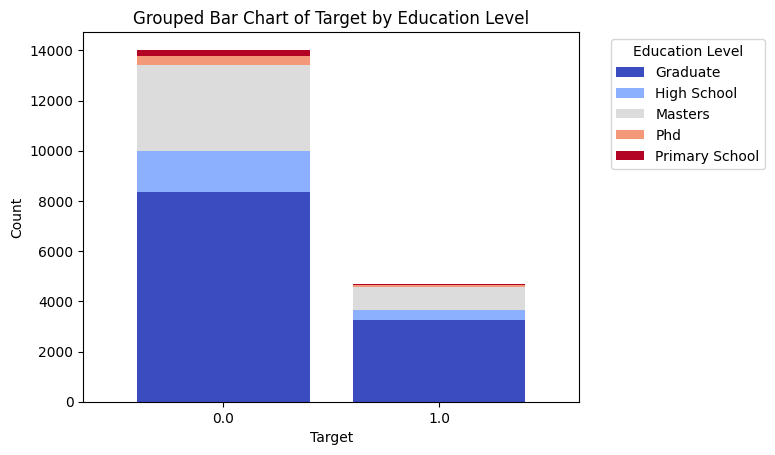

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'education_level' and 'target' columns

# Count occurrences of each combination of 'education_level' and 'target'
education_target_counts = data.groupby(['education_level', 'target']).size().unstack(fill_value=0)

# Transpose the DataFrame
education_target_counts = education_target_counts.T

# Plotting grouped bar chart
plt.figure(figsize=(10, 6))
education_target_counts.plot(kind='bar', stacked=True, colormap='coolwarm', width=0.8)
plt.title('Grouped Bar Chart of Target by Education Level')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


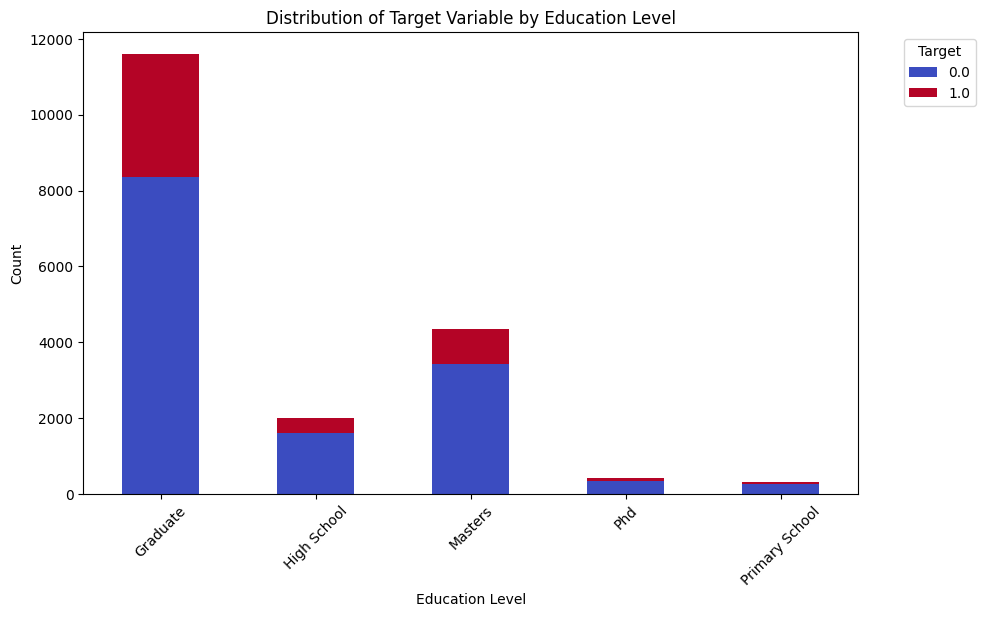

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'education_level' and 'target' columns

# Grouping data by 'education_level' and 'target', and counting occurrences
education_target_counts = data.groupby(['education_level', 'target']).size().unstack(fill_value=0)

# Plotting bar chart
education_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribution of Target Variable by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


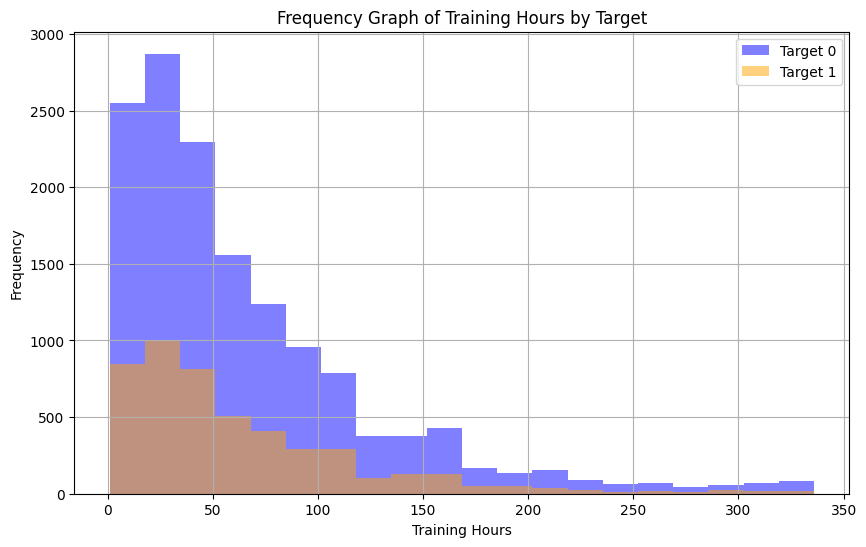

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'training_hours' and 'target' columns

# Separate data based on 'target' values
target_0 = data[data['target'] == 0]['training_hours']
target_1 = data[data['target'] == 1]['training_hours']

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist(target_0, bins=20, alpha=0.5, label='Target 0', color='blue')
plt.hist(target_1, bins=20, alpha=0.5, label='Target 1', color='orange')
plt.title('Frequency Graph of Training Hours by Target')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


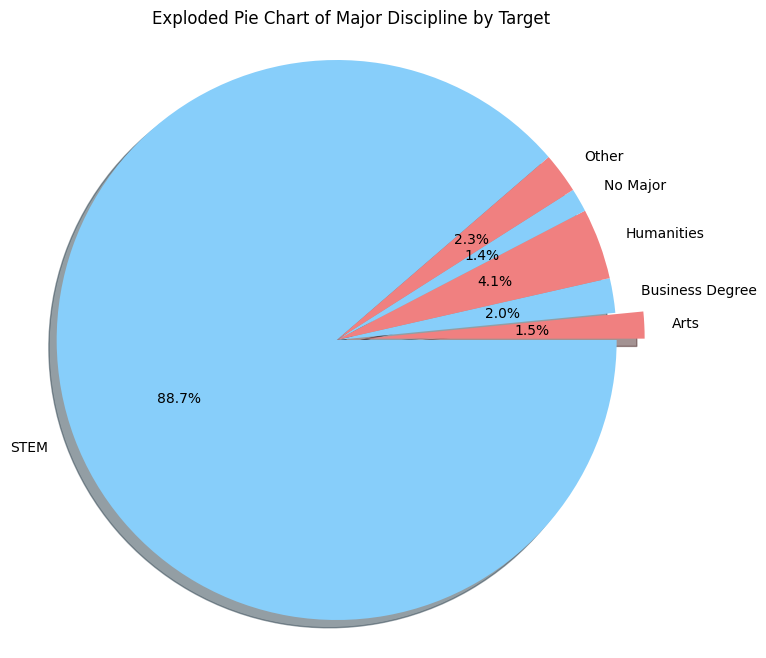

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'major_discipline' and 'target' columns

# Count occurrences of each combination of 'major_discipline' and 'target'
discipline_target_counts = data.groupby(['major_discipline', 'target']).size().unstack(fill_value=0)

# Plotting exploded pie chart
plt.figure(figsize=(8, 8))

# Data for the pie chart
sizes = discipline_target_counts.sum(axis=1)
labels = sizes.index
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]  # Explode the first slice only

# Colors for each slice
colors = ['lightcoral', 'lightskyblue']

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True)

# Setting aspect ratio to be equal so the pie looks like a circle
plt.axis('equal')

# Setting title
plt.title('Exploded Pie Chart of Major Discipline by Target')
plt.show()


<ipython-input-775-19d1f4a9547c>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['target'] == 0]['company_size_encoded'], label='Target 0', shade=True)
<ipython-input-775-19d1f4a9547c>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['target'] == 1]['company_size_encoded'], label='Target 1', shade=True)


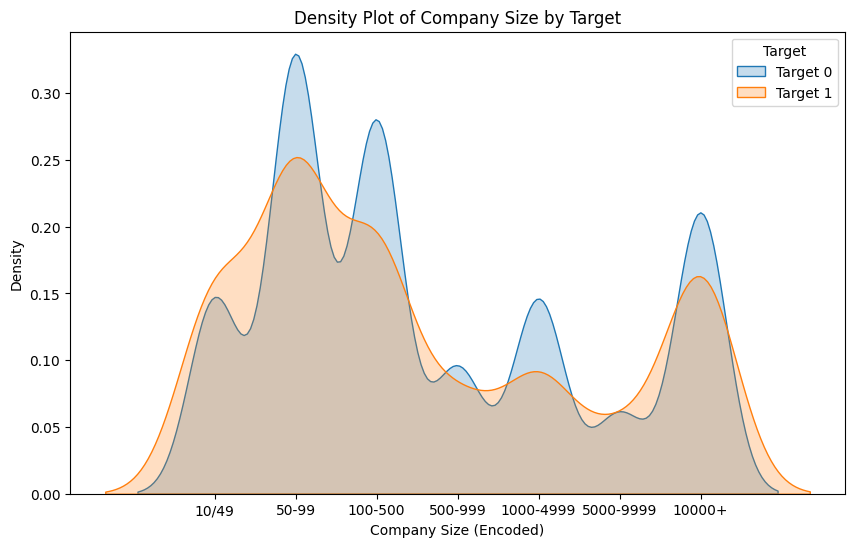

In [ ]:
# Map 'company_size' categories to numerical values
company_size_mapping = {
    '10/49': 1,
    '50-99': 2,
    '100-500': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '10000+': 7
}

# Encode 'company_size' into numerical values
data['company_size_encoded'] = data['company_size'].map(company_size_mapping)

# Plot density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['target'] == 0]['company_size_encoded'], label='Target 0', shade=True)
sns.kdeplot(data=data[data['target'] == 1]['company_size_encoded'], label='Target 1', shade=True)
plt.title('Density Plot of Company Size by Target')
plt.xlabel('Company Size (Encoded)')
plt.ylabel('Density')
plt.xticks(ticks=range(1, 8), labels=company_size_mapping.keys())  # Set x-axis ticks to company size labels
plt.legend(title='Target')
plt.show()



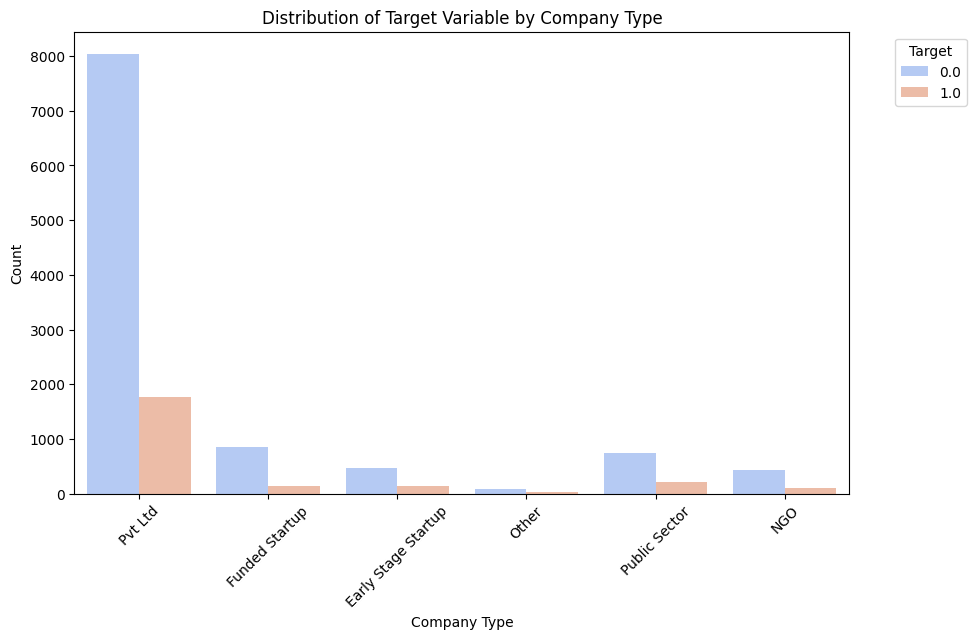

In [ ]:
# Count occurrences of each combination of 'enrolled_university' and 'target'
university_target_counts = data.groupby(['company_type', 'target']).size().unstack(fill_value=0)

# Plotting count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='company_type', hue='target', palette='coolwarm')
plt.title('Distribution of Target Variable by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



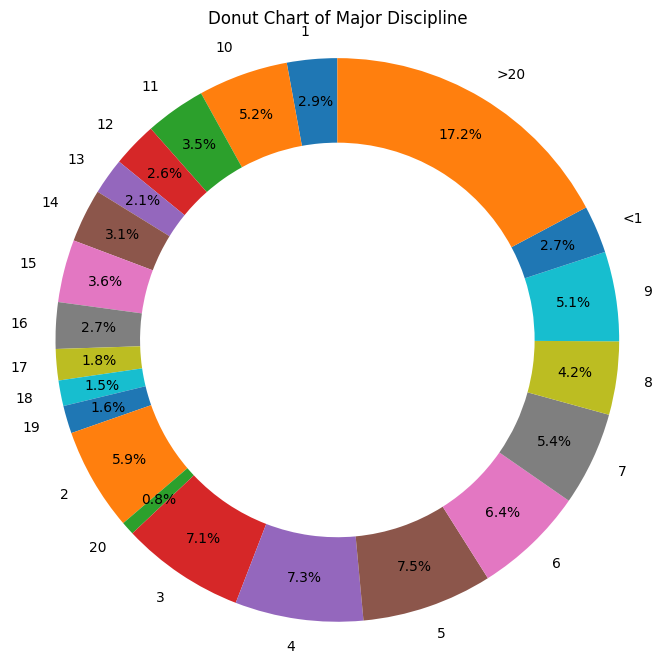

In [ ]:
# Count occurrences of each combination of 'major_discipline' and 'target'
discipline_target_counts = data.groupby(['experience', 'target']).size().unstack(fill_value=0)

# Calculate the total count of each 'major_discipline'
total_counts = discipline_target_counts.sum(axis=1)

# Plotting donut chart
plt.figure(figsize=(8, 8))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))
plt.title('Donut Chart of Major Discipline')
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white')) # Add a white circle in the center to create a hole
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<Figure size 1000x600 with 0 Axes>

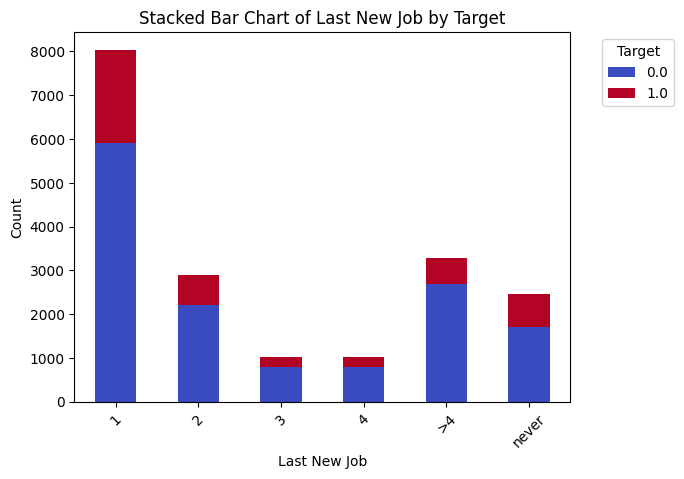

In [ ]:


# Count occurrences of each combination of 'last_new_job' and 'target'
job_target_counts = data.groupby(['last_new_job', 'target']).size().unstack(fill_value=0)

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
job_target_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Stacked Bar Chart of Last New Job by Target')
plt.xlabel('Last New Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
print(data.columns)

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'company_size_encoded'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
 13  company_size_encoded    11912 non-null  float64
dtypes: float64(3), int64(1), object(10)
me

In [ ]:
data.isnull().sum()


city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
company_size_encoded      7246
dtype: int64

In [ ]:
null_percentage = data.isnull().sum() / data.shape[0]
null_percentage

city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
company_size_encoded      0.378223
dtype: float64

In [ ]:
COPY = data
null_columns = null_percentage[null_percentage > 0].index
for i in null_columns:
    data[i] = data[i].fillna(COPY[i].mode()[0])

In [ ]:
data.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
company_size_encoded      0
dtype: int64

In [ ]:
def experience(x:str)->int:
    if type(x) == int:
        pass
    elif '>' in x:
        x = 21
    elif '<' in x:
        x = 0
    else:
        x = int(x.strip())
    return x

data['experience'] = data.experience.map(experience)

In [ ]:
# formating new_job column

def new_job(x:str)->int:

    if type(x) == int:
        pass
    elif 'n' == x[0]:
        x = 0
    elif '>' in x:
        x = 5
    else:
        x = int(x.strip())
    return x

data['last_new_job'] = data.last_new_job.map(new_job)

In [ ]:
data['company_size'].unique()


array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
# formating company_size column

company_size = {
    '<10'       : 0,
    '10/49'     : 1,
    '50-99'     : 2,
    '100-500'   : 3,
    '500-999'   : 4,
    '1000-4999' : 5,
    '5000-9999' : 6,
    '10000+'    : 7
}

data['company_size'] = data.company_size.map(lambda x : company_size[x])

In [ ]:
data.dtypes


city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int64
company_size                int64
company_type               object
last_new_job                int64
training_hours              int64
target                    float64
company_size_encoded      float64
dtype: object

In [ ]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(data[["gender", "enrolled_university"]]).toarray()

feature_label = ohe.categories_
feature_label = np.array(feature_label).ravel()
print(feature_label)

features = pd.DataFrame(feature_array, columns=feature_label)
data1 = pd.concat([data, features], axis=1)

['Female' 'Male' 'Other' 'Full time course' 'Part time course'
 'no_enrollment']


In [ ]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(data[["relevent_experience"]]).toarray()

feature_label=ohe.categories_


feature_label=np.array(feature_label).ravel()
print(feature_label)

features=pd.DataFrame(feature_array, columns = feature_label)
final_data=pd.concat([data1,features], axis=1)
final_data.head()

['Has relevent experience' 'No relevent experience']


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,...,target,company_size_encoded,Female,Male,Other,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,2,Pvt Ltd,...,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,2,Pvt Ltd,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,2,Pvt Ltd,...,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,2,Pvt Ltd,...,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,2,Funded Startup,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(data[["education_level"]]).toarray()

feature_label=ohe.categories_


feature_label=np.array(feature_label).ravel()
print(feature_label)

features=pd.DataFrame(feature_array, columns = feature_label)
final1_data=pd.concat([final_data,features], axis=1)
final1_data.head()
print()

ohe=OneHotEncoder()
feature_array=ohe.fit_transform(data[["company_type"]]).toarray()

feature_label=ohe.categories_


feature_label=np.array(feature_label).ravel()
print(feature_label)

features=pd.DataFrame(feature_array, columns = feature_label)
final1_data=pd.concat([final1_data,features], axis=1)
final1_data.head()

['Graduate' 'High School' 'Masters' 'Phd' 'Primary School']

['Early Stage Startup' 'Funded Startup' 'NGO' 'Other' 'Public Sector'
 'Pvt Ltd']


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,...,High School,Masters,Phd,Primary School,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,2,Pvt Ltd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,2,Pvt Ltd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,2,Pvt Ltd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,2,Pvt Ltd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,2,Funded Startup,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
final1_data.drop(["city"], axis = 1 , inplace=True)

In [ ]:
final1_data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,High School,Masters,Phd,Primary School,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,2,Pvt Ltd,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,2,Pvt Ltd,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,2,Pvt Ltd,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,2,Pvt Ltd,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,2,Funded Startup,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


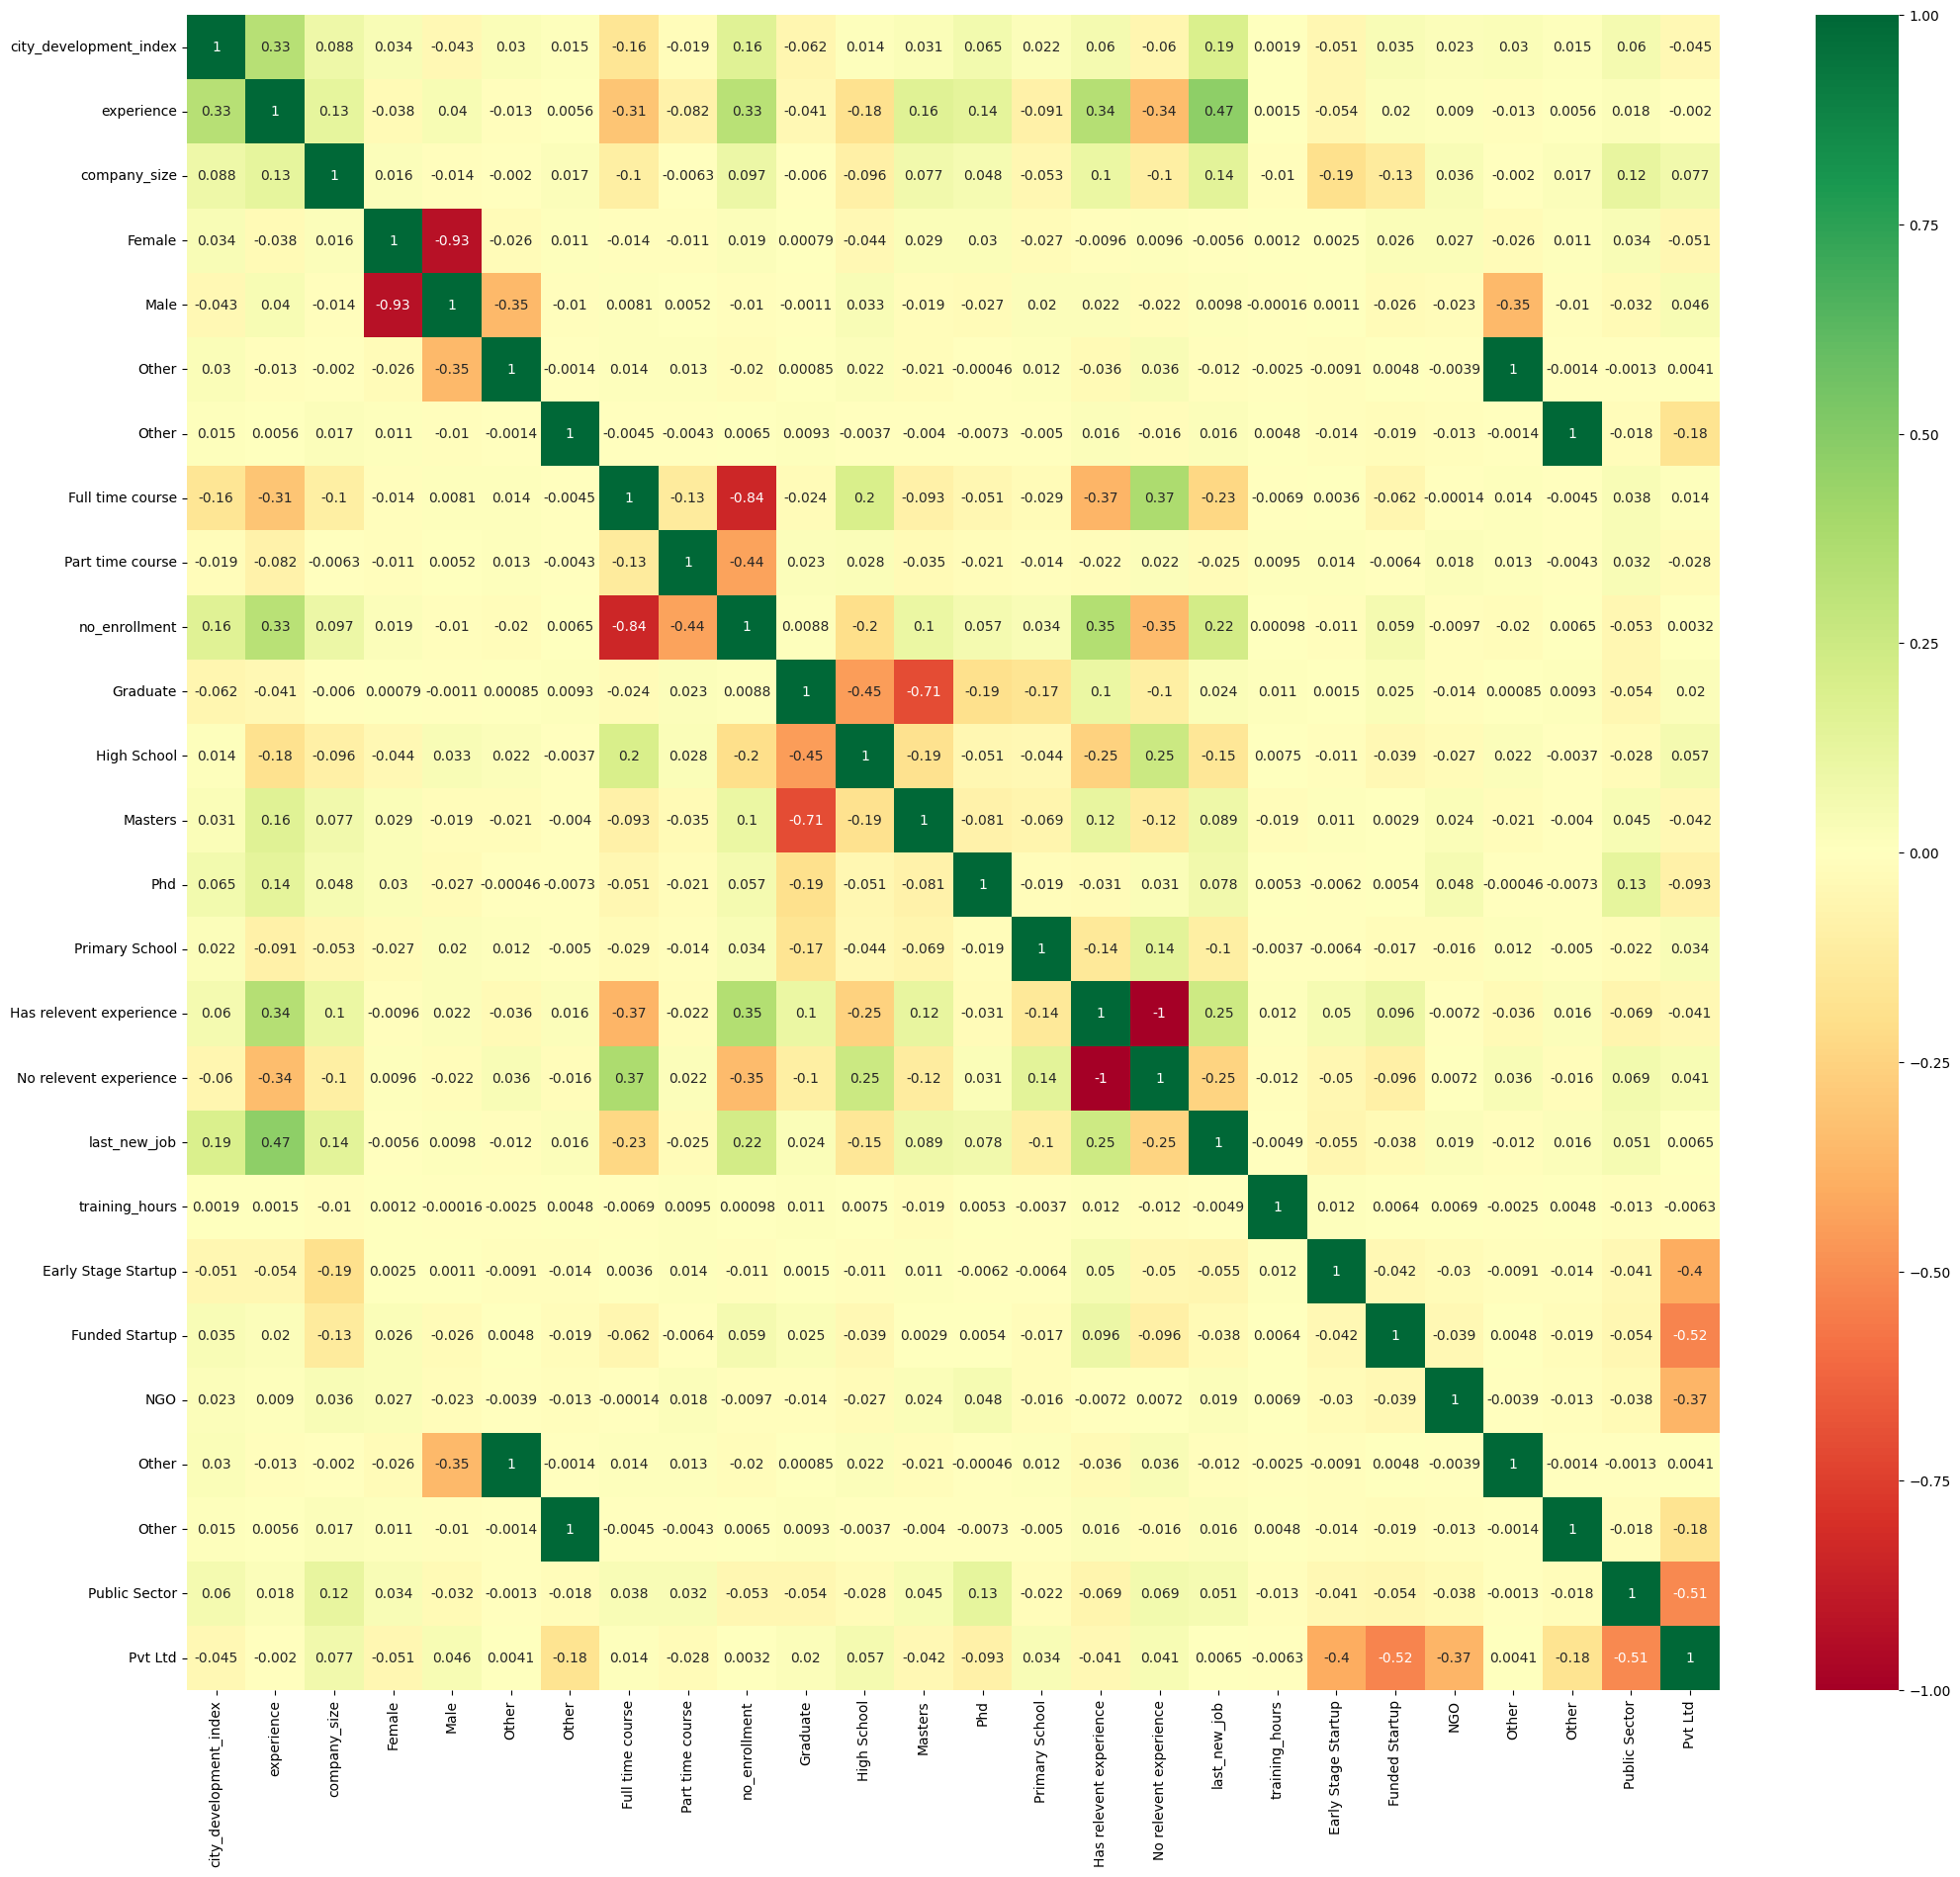

In [ ]:
Selected_features = [ 'city_development_index','experience', 'company_size','Female','Male','Other','Full time course','Part time course','no_enrollment','Graduate', 'High School', 'Masters', 'Phd', 'Primary School',
                       'Has relevent experience','No relevent experience' ,'last_new_job','training_hours','Early Stage Startup', 'Funded Startup', 'NGO', 'Other', 'Public Sector',
 'Pvt Ltd']
X1 = final1_data[Selected_features]

plt.subplots(figsize=(25, 22))
sns.heatmap(X1.corr(), annot=True, cmap="RdYlGn")
plt.show()